In [409]:
import numpy as np
import matplotlib.pyplot as plt

In [459]:
n0=1
k=1.381e-23
T0=2930
m0=4*1.66054e-27
m=9.11e-31
E=0#1e-21*n0
q=1.602e-19

In [480]:
n=1000
B=np.zeros((n,1))
A=np.zeros((n,n))

vmin=1
vmax=1*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))

dv=v[:n-1]-v[1:]#v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)

In [481]:
def vm(v):
    return 5e-20*n0*np.sqrt(2/m*1.6e-19)
def dvm(v):
    return 0

In [482]:
def a(v):
    return q**2*E**2/(3*vm(v)) + k*T0*vm(v)/m0
def b(v):
    return (k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [483]:
def f1(f,g,v):
    return g
def f2(f,g,v):
    return -b(v)*g/a(v)-c(v)*f/a(v)

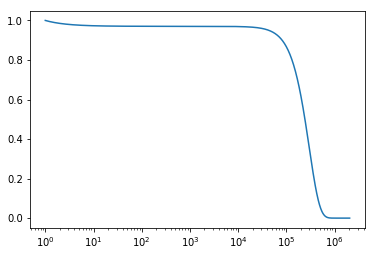

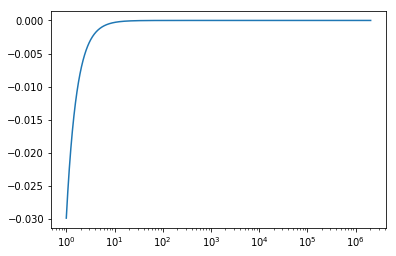

In [485]:
f=np.zeros(n)
g=-np.ones(n)
for i in range(n-1,0,-1):
    k11=dv[i-1]*f1(f[i],g[i],v[i])
    k21=dv[i-1]*f2(f[i],g[i],v[i])
    k12=dv[i-1]*f1(f[i]+0.5*k11,g[i]+0.5*k21,v[i]+0.5*dv[i-1])
    k22=dv[i-1]*f2(f[i]+0.5*k11,g[i]+0.5*k21,v[i]+0.5*dv[i-1])
    k13=dv[i-1]*f1(f[i]+0.5*k12,g[i]+0.5*k22,v[i]+0.5*dv[i-1])
    k23=dv[i-1]*f2(f[i]+0.5*k12,g[i]+0.5*k22,v[i]+0.5*dv[i-1])
    k14=dv[i-1]*f1(f[i]+k13,g[i]+k23,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
    k24=dv[i-1]*f2(f[i]+k13,g[i]+k23,v[i]+dv[i-1]) #v[i-1]) #v[i]+dv[i]);
    f[i-1]=f[i]+(k11+2*k12+2*k13+k14)/6
    g[i-1]=g[i]+(k21+2*k22+2*k23+k24)/6
    norm=np.max(np.abs(f)) #max(np.max(np.abs(f)),np.max(np.abs(g)))
    #print(np.max(np.abs(f)),np.max(np.abs(g)))
    f=f/norm
    g=g/norm


plt.semilogx(v,f)
plt.show()
plt.semilogx(v,g)
plt.show()

In [437]:
'''vmin=1e14
vmax=1e20*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))

mu=-3*m**3*vm(v)**2/(q**2*E**2)
f_anal=np.sqrt(-2*mu/np.pi)*np.exp(mu*v**2/2)
g_anal=mu*v*np.sqrt(-2*mu/np.pi)*np.exp(mu*v**2/2)

plt.semilogx(0.5*m*v**2,f_anal)
plt.show()
plt.semilogx(v,g_anal)
plt.show()'''

'vmin=1e14\nvmax=1e20*np.sqrt(24*1.602e-19/m)\nv=np.logspace(np.log10(vmin),np.log10(vmax),n)\nv=np.reshape(v,(n,1))\n\nmu=-3*m**3*vm(v)**2/(q**2*E**2)\nf_anal=np.sqrt(-2*mu/np.pi)*np.exp(mu*v**2/2)\ng_anal=mu*v*np.sqrt(-2*mu/np.pi)*np.exp(mu*v**2/2)\n\nplt.semilogx(0.5*m*v**2,f_anal)\nplt.show()\nplt.semilogx(v,g_anal)\nplt.show()'

2.88680842283e-67


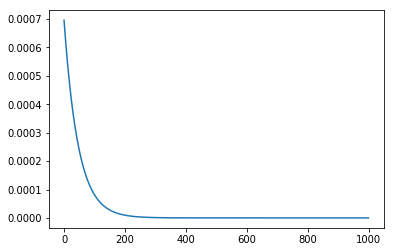

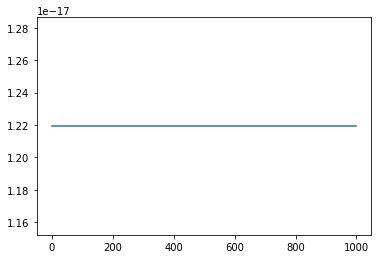

In [433]:
print(a(v))
plt.plot(b(v))
plt.show()
plt.plot(c(v))
plt.show()